
# Project for UCD Professional Academy

Data Source: https://www.kaggle.com/datasets/rajeevw/ufcdata?select=data.csv


In [1]:
# importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data into a pandas DataFrame

df = pd.read_csv('data.csv')
df2 = pd.read_csv('raw_fighter_details.csv')
df3 = pd.read_csv('raw_total_fight_data.csv', sep=';')

In [3]:
# create copies that I will manipulate. I want to keep original dataframes in tact.

df_data = df.copy()
df_fighter = df2.copy()
df_fights = df3.copy()

In [4]:
# display the first 5 rows of df_data
df_data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [6]:
# checking data types
df_data.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object

In [7]:
# more data cleaning will take place later, but I know I'll need date, so creating a datetime column now.
df_data['Date_frmt'] = pd.to_datetime(df_data['date'])

In [8]:
# verifying that the above is correct.
df_data.dtypes

R_fighter               object
B_fighter               object
Referee                 object
date                    object
location                object
                     ...      
R_Reach_cms            float64
R_Weight_lbs           float64
B_age                  float64
R_age                  float64
Date_frmt       datetime64[ns]
Length: 145, dtype: object

In [9]:
df_data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,2021-03-20
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,2021-03-20
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,2021-03-20
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,2021-03-20
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,2021-03-20


In [10]:
# check the shape of df_data
df_data.shape

(6012, 145)

In [11]:
# view summary of df_data
df_data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [12]:
df_fighter.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [13]:
df_fighter.shape

(3596, 14)

In [14]:
df_fighter.describe()

,SLpM,SApM,TD_Avg,Sub_Avg
count,3596.000000,3596.000000,3596.000000,3596.000000
mean,2.279633,2.982948,1.211243,0.636707
std,1.901956,2.814008,1.914020,1.566843
min,0.000000,0.000000,0.000000,0.000000
25%,0.700000,1.400000,0.000000,0.000000
50%,2.170000,2.760000,0.510000,0.000000
75%,3.420000,4.002500,1.885000,0.800000
max,19.910000,52.500000,32.140000,21.900000


In [15]:
df_fights.shape

(6012, 41)

In [16]:
df_fights.describe()

,R_KD,B_KD,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,last_round
count,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000
mean,0.249834,0.179807,0.481371,0.343979,0.137725,0.135396,2.316700
std,0.523408,0.456132,0.924078,0.791808,0.422296,0.414708,1.008284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
max,5.000000,4.000000,10.000000,7.000000,5.000000,3.000000,5.000000



### Data Cleaning


In [17]:
# check for null values
print("Total nulls in df_data: ", df_data.isna().sum().sum())

Total nulls in df_data:  106494


In [18]:
# check for total null values, set max rows to none to show all data.
pd.set_option('display.max_rows', None)
sort_na = df_data.isna().sum()
sort_na = sort_na[sort_na != 0].sort_values(ascending=False)
sort_na

B_avg_opp_DISTANCE_landed       1427
B_avg_CLINCH_att                1427
B_avg_BODY_att                  1427
B_avg_BODY_landed               1427
B_avg_opp_BODY_att              1427
B_avg_opp_BODY_landed           1427
B_avg_LEG_landed                1427
B_avg_opp_LEG_att               1427
B_avg_opp_LEG_landed            1427
B_avg_DISTANCE_att              1427
B_avg_DISTANCE_landed           1427
B_avg_opp_DISTANCE_att          1427
B_avg_CLINCH_landed             1427
B_avg_opp_HEAD_att              1427
B_avg_opp_CLINCH_att            1427
B_avg_opp_CLINCH_landed         1427
B_avg_GROUND_att                1427
B_avg_GROUND_landed             1427
B_avg_opp_GROUND_att            1427
B_avg_opp_GROUND_landed         1427
B_avg_CTRL_time(seconds)        1427
B_avg_opp_CTRL_time(seconds)    1427
B_total_time_fought(seconds)    1427
B_avg_KD                        1427
B_avg_opp_HEAD_landed           1427
B_avg_LEG_att                   1427
B_avg_HEAD_landed               1427
B

In [19]:
# The nulls in "B_avg_DISTANCE_att" (and all other stats) are null for debuting fighters in the UFC. 
# As these columns represent previous performance in the UFC, they will only populated for a fighter's subsequent fights.
# The reason why the blue corner has more nulls is because champions and higher-ranked fighters are assigned the red corner, thus debutants generally debut in the blue corner.
# We will decide how to deal with these later.
# Example below, see fighter Tai Tuivasa's fights. His first has nulls.
pd.set_option('display.max_columns', False)
df_data[(df_data['R_fighter'] == 'Tai Tuivasa') | (df_data['B_fighter'] == 'Tai Tuivasa')]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,59.234375,30.375000,43.812500,24.796875,70.500000,41.390625,50.234375,30.906250,0.031250,0.000000,2.843750,1.750000,42.500000,16.781250,34.296875,17.937500,5.781250,4.546875,6.125000,3.718750,10.953125,9.046875,3.390625,3.140625,45.875000,20.281250,36.343750,18.687500,11.328125,8.562500,1.437500,1.171875,2.031250,1.531250,6.031250,4.937500,82.453125,89.781250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,2021-03-20
201,Stefan Struve,Tai Tuivasa,Jason Herzog,2020-10-24,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Blue,False,Heavyweight,0.09375,0.375,0.437812,0.517188,0.000,0.625,0.0,0.5,0.0,0.0,76.46875,33.75,68.625,36.59375,78.000,34.78125,81.46875,48.8125,0.0625,0.000,4.6875,3.5,57.0,18.5625,62.59375,31.875,7.5625,5.09375,4.25,3.4375,11.90625,10.09375,1.78125,1.28125,63.750,26.5625,53.6875,24.375,11.65625,7.125,2.875,2.34375,1.0625,0.0625,12.0625,9.875,60.90625,179.5625,597.40625,12,0,3,...,59.780116,34.365727,81.343473,47.921511,66.502104,40.391411,109.166523,73.336073,1.003969,0.285219,2.074002,0.956814,35.103954,13.210841,61.176134,30.738626,14.061064,11.322215,12.635677,11.140892,10.615098,9.832672,7.531662,6.041992,55.110935,30.070628,52.348854,25.664841,3.937342,3.914135,15.124358,10.284497,0.731839,0.380964,13.870261,11.972173,37.292190,298.214305,615.260525,45,0,0,1,4,13,10,0,1,0,1,5,6,0,Orthodox,210.82,213.36,265.0,27.0,32.0,2020-10-24
688,Tai Tuivasa,Serghei Spivac,Steve Perceval,2019-10-05,"Melb

In [20]:
# inspect other nulls

# stances

df_data['B_Stance'].value_counts()

Orthodox       4530
Southpaw       1165
Switch          238
Open Stance       9
Sideways          4
Name: B_Stance, dtype: int64

In [21]:
df_data['R_Stance'].value_counts()

Orthodox       4538
Southpaw       1231
Switch          197
Open Stance      15
Sideways          2
Name: R_Stance, dtype: int64

<AxesSubplot:xlabel='B_Stance', ylabel='count'>

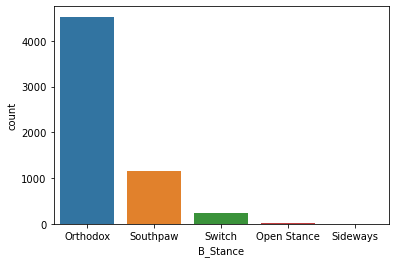

In [22]:
sns.countplot(data=df_data, x='B_Stance')

<AxesSubplot:xlabel='R_Stance', ylabel='count'>

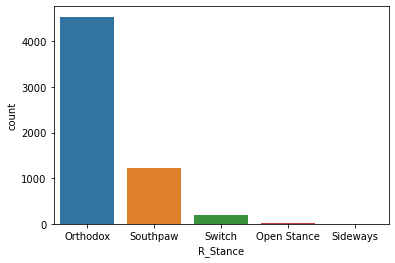

In [23]:
sns.countplot(data=df_data, x='R_Stance')     #easier and quicker 

In [24]:
# set null stances to orthodox. It's statistically the most likely option.

df_data['B_Stance'] = df_data['B_Stance'].fillna('Orthodox')
df_data['R_Stance'] = df_data['R_Stance'].fillna('Orthodox')

In [25]:
# check for total null values, set max rows to none to show all data.

pd.set_option('display.max_rows', None)
sort_na_v2 = df_data.isna().sum()
sort_na_v2 = sort_na_v2[sort_na_v2 != 0].sort_values(ascending=False)
sort_na_v2

B_avg_opp_DISTANCE_att          1427
B_avg_CLINCH_att                1427
B_avg_BODY_att                  1427
B_avg_BODY_landed               1427
B_avg_opp_BODY_att              1427
B_avg_opp_BODY_landed           1427
B_avg_LEG_landed                1427
B_avg_opp_LEG_att               1427
B_avg_opp_LEG_landed            1427
B_avg_DISTANCE_att              1427
B_avg_DISTANCE_landed           1427
B_avg_opp_DISTANCE_landed       1427
B_avg_CLINCH_landed             1427
B_avg_opp_HEAD_att              1427
B_avg_opp_CLINCH_att            1427
B_avg_opp_CLINCH_landed         1427
B_avg_GROUND_att                1427
B_avg_GROUND_landed             1427
B_avg_opp_GROUND_att            1427
B_avg_opp_GROUND_landed         1427
B_avg_CTRL_time(seconds)        1427
B_avg_opp_CTRL_time(seconds)    1427
B_total_time_fought(seconds)    1427
B_avg_KD                        1427
B_avg_opp_HEAD_landed           1427
B_avg_LEG_att                   1427
B_avg_HEAD_landed               1427
B

In [26]:
# inspect other nulls

# missing weights
pd.set_option('display.max_columns', False)
df_data[df_data['R_Weight_lbs'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
5903,Jack Nilson,Saeed Hosseini,Joe Hamilton,1997-05-30,"Augusta, Georgia, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,NaN,NaN,NaN,1997-05-30
6004,Frank Hamaker,Thaddeus Luster,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,NaN,NaN,NaN,1994-03-11


In [27]:
pd.set_option('display.max_columns', False)
df_data[df_data['B_Weight_lbs'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
5847,Laverne Clark,Frank Caracci,Tony Mullinax,1999-01-08,"New Orleans, Louisiana, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,180.34,NaN,170.0,NaN,25.0,1999-01-08
5859,Tulio Palhares,Adriano Santos,John McCarthy,1998-10-16,"Sao Paulo, Brazil",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,1998-10-16
5867,Chuck Liddell,Noe Hernandez,Joe Hamilton,1998-05-15,"Mobile, Alabama, USA",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,187.96,193.04,205.0,NaN,28.0,1998-05-15
5894,Alex Hunter,Sam Fulton,Joe Hamilton,1997-07-27,"Birmingham, Alabama, USA",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [28]:
# We will first attempt to set weight to opponents weight, so where R_Weight_lbs is null, set it to B_Weight_lbs.
# This is because fighters should weigh the same as their opponents, unless in edge cases where they miss weight or it's a catchweight or openweight bout. The latter doesn't happen anymore in the UFC and the former is rare.
# We can drop these 2 remaining rows with nulls in weight. These are old fights with insignificant data.
df_data['R_Weight_lbs'] = df_data['R_Weight_lbs'].fillna(df['B_Weight_lbs']) 
df_data['B_Weight_lbs'] = df_data['B_Weight_lbs'].fillna(df['R_Weight_lbs']) 
df_data = df_data.dropna(subset=['R_Weight_lbs', 'B_Weight_lbs'])

In [29]:
pd.set_option('display.max_columns', False)
df_data[df_data['R_Weight_lbs'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt


In [30]:
pd.set_option('display.max_rows', None)
sort_na_v3 = df_data.isna().sum()
sort_na_v3 = sort_na_v3[sort_na_v3 != 0].sort_values(ascending=False)
sort_na_v3                   

B_avg_opp_DISTANCE_att          1426
B_avg_CLINCH_att                1426
B_avg_BODY_att                  1426
B_avg_BODY_landed               1426
B_avg_opp_BODY_att              1426
B_avg_opp_BODY_landed           1426
B_avg_LEG_landed                1426
B_avg_opp_LEG_att               1426
B_avg_opp_LEG_landed            1426
B_avg_DISTANCE_att              1426
B_avg_DISTANCE_landed           1426
B_avg_opp_DISTANCE_landed       1426
B_avg_CLINCH_landed             1426
B_avg_opp_HEAD_att              1426
B_avg_opp_CLINCH_att            1426
B_avg_opp_CLINCH_landed         1426
B_avg_GROUND_att                1426
B_avg_GROUND_landed             1426
B_avg_opp_GROUND_att            1426
B_avg_opp_GROUND_landed         1426
B_avg_CTRL_time(seconds)        1426
B_avg_opp_CTRL_time(seconds)    1426
B_total_time_fought(seconds)    1426
B_avg_KD                        1426
B_avg_opp_HEAD_landed           1426
B_avg_LEG_att                   1426
B_avg_HEAD_landed               1426
B

In [31]:
# missing heights

pd.set_option('display.max_columns', False)
df_data[df_data['B_Height_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
4270,Terry Etim,Edward Faaloloto,Leon Roberts,2011-11-05,"Birmingham, England, United Kingdom",Red,False,Lightweight,0.0,1.0,0.39,0.36,0.0,1.0,0.0,0.0,0.0,0.0,43.0,17.0,73.0,27.0,47.0,21.0,75.0,29.0,0.0,0.0,1.0,1.0,26.0,3.0,57.0,17.0,6.0,5.0,13.0,10.0,11.0,9.0,3.0,0.0,31.0,10.0,41.0,9.0,12.0,7.0,16.0,11.0,0.0,0.0,16.0,7.0,11.0,65.0,282.0,1,0,0,...,40.476562,15.007812,52.023438,20.46875,43.757812,17.71875,76.898438,42.09375,0.132812,0.0625,2.617188,1.53125,28.164062,6.25,40.039062,12.1875,2.390625,0.773438,3.6875,2.78125,9.921875,7.984375,8.296875,5.5,36.421875,12.328125,33.507812,6.4375,3.117188,2.539062,3.6875,3.484375,0.9375,0.140625,14.828125,10.546875,69.570312,219.171875,509.09375,18,0,1,0,4,5,3,0,0,0,1,1,3,0,Orthodox,185.42,185.42,155.0,27.0,25.0,2011-11-05
4388,Michael Johnson,Edward Faaloloto,Mark Matheny,2011-06-26,"Pittsburgh, Pennsylvania, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,62.000000,30.000000,67.000000,32.00000,70.000000,38.00000,95.000000,57.00000,1.000000,0.0000,13.000000,3.00000,55.000000,24.00,67.000000,32.0000,3.000000,2.000000,0.0000,0.00000,4.000000,4.000000,0.000000,0.0,44.000000,18.000000,30.000000,7.0000,13.000000,10.000000,4.0000,2.000000,5.0000,2.000000,33.000000,23.000000,74.000000,586.000000,900.00000,3,1,0,1,0,0,1,0,0,0,0,0,0,0,Southpaw,177.80,185.42,155.0,26.0,25.0,2011-06-26
5847,Laverne Clark,Frank Caracci,Tony Mullinax,1999-01-08,"New Orleans, Louisiana, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [32]:
df_data[df_data['R_Height_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
4479,Tom Blackledge,Anthony Perosh,John Sharp,2011-02-26,"Sydney, New South Wales, Australia",Blue,False,LightHeavyweight,0.25,0.5,0.4075,0.475,0.0675,0.25,0.0,0.5,0.0,0.5,43.5,18.5,89.5,34.25,52.0,26.5,121.5,63.25,8.25,0.75,0.75,0.25,36.5,11.75,84.0,29.0,1.0,0.75,3.5,3.25,6.0,6.0,2.0,2.0,32.75,11.25,61.25,18.0,8.5,5.5,11.75,7.75,2.25,1.75,16.5,8.5,85.75,166.25,565.5,6,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,205.0,38.0,NaN,2011-02-26
5859,Tulio Palhares,Adriano Santos,John McCarthy,1998-10-16,"Sao Paulo, Brazil",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,1998-10-16
6004,Frank Hamaker,Thaddeus Luster,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,210.0,NaN,NaN,1994-03-11


In [33]:
# We will see if these can be fixed through the fighters dataframe. We will also use this dataframe to fix reach.
# check reach column for red fighter. 
get_r_reach_cm_na = df_data[df_data['R_Reach_cms'].isna()]
get_r_reach_cm_na.groupby(['R_fighter']).size().sort_values(ascending=False)

R_fighter
Don Frye                    9
Dan Severn                  9
Pedro Rizzo                 9
David Abbott                8
Pat Miletich                8
Royce Gracie                8
Oleg Taktarov               6
Frank Shamrock              5
Din Thomas                  5
Jerry Bohlander             5
Ricco Rodriguez             5
Paul Varelans               4
Marco Ruas                  4
Mark Kerr                   4
Maurice Smith               4
Patrick Smith               4
Kevin Randleman             4
Guy Mezger                  4
Gary Goodridge              4
Remco Pardoel               3
Ivan Salaverry              3
Laverne Clark               3
Fabiano Iha                 3
Eugene Jackson              3
Dave Beneteau               3
Tsuyoshi Kohsaka            3
Tor Troeng                  3
Jumabieke Tuerxun           3
Murilo Bustamante           3
Thiago Perpetuo             3
Bruno Silva                 3
Shonie Carter               3
Ian Freeman                 3


In [34]:
# From the above, you can see the large volume of these nulls are mostly from old fighters who competed in the early days.
# This also applies to some of the other columns I previously cleaned up. The UFC didn't document measurements then as closely as they do now.
# Due to the sports changes, we may limit the data to after a certain date. But we can check if the fighter df contains this data to join.
# First, let's see if most nulls disappear after a date limitation.

In [35]:
get_r_reach_cm_na_dfilt = get_r_reach_cm_na[(get_r_reach_cm_na['Date_frmt'] >= '1 Jan 2004')] 
print('Null values in r_reach_cm: ' + str(get_r_reach_cm_na['R_Reach_cms'].isna().sum()) )
print('Null values in r_reach_cm with date filter: ' + str(get_r_reach_cm_na_dfilt['R_Reach_cms'].isna().sum()) )


Null values in r_reach_cm: 405
Null values in r_reach_cm with date filter: 167


In [36]:
# This removes quite a few, but there are still some missing values. 
# Verify that values are missing from the df_fighter DataFrame, as well.

df_fighter[(df_fighter['fighter_name'].isin(get_r_reach_cm_na['R_fighter']))].sort_values(by=['fighter_name'])

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
2389,Alan Omer,"5' 10""",145 lbs.,NaN,Orthodox,"Sep 14, 1988",3.49,55%,2.21,64%,1.69,42%,66%,0.0
535,Albert Cheng,"5' 11""",170 lbs.,NaN,Orthodox,"Feb 07, 1985",1.00,41%,2.60,71%,0.00,0%,0%,0.0
3306,Alberto Uda,"6' 3""",185 lbs.,NaN,Orthodox,"Aug 08, 1984",1.79,52%,3.49,45%,2.83,50%,66%,0.0
1427,Alex Hunter,"5' 9""",226 lbs.,NaN,Orthodox,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3067,Alex Soto,"5' 8""",135 lbs.,NaN,Southpaw,"Feb 15, 1984",2.95,25%,5.02,59%,2.82,30%,0%,0.0
830,Alexis Dufresne,"5' 9""",135 lbs.,NaN,Orthodox,"Aug 31, 1990",1.33,27%,3.33,60%,1.50,50%,50%,0.0
284,Amaury Bitetti,"5' 9""",185 lbs.,NaN,Orthodox,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
2703,Andre Roberts,"6' 2""",345 lbs.,NaN,Orthodox,"Feb 24, 1965",0.00,0%,0.00,0%,0.00,0%,0%,0.0
3097,Andreas Stahl,"5' 11""",170 lbs.,NaN,Orthodox,"May 20, 1988",2.83,37%,4.74,57%,1.55,66%,80%,0.0
2925,Andrei Semenov,"6' 0""",185 lbs.,NaN,Orthodox,"Jun 17, 1977",0.78,15%,2.44,60%,1.74,80%,55%,0.4


In [37]:
# We could find another dataset or use web scraping to get this value. 
# However, I assume reach and height will be highly correlated, so if true, we can use that.

df_data[['R_Height_cms', 'R_Reach_cms']].corr(method='pearson')


,R_Height_cms,R_Reach_cms
R_Height_cms,1.000000,0.893139
R_Reach_cms,0.893139,1.000000


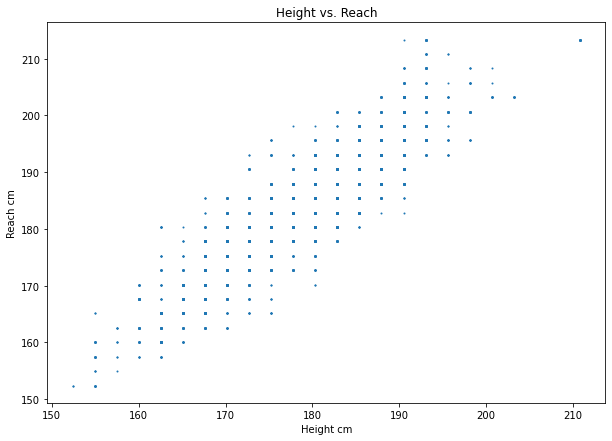

In [78]:
# We can see height and reach are indeed highly correlated, visualised below.
plt.figure(figsize =(10, 7))
plt.title('Height vs. Reach')
plt.xlabel('Height cm')
plt.ylabel('Reach cm')
plt.scatter(df_data['R_Height_cms'], df_data['R_Reach_cms'], s=1)

In [39]:
# Verify this applies to blue corner fighter, too.
df_data[['B_Height_cms', 'B_Reach_cms']].corr(method='pearson')

,B_Height_cms,B_Reach_cms
B_Height_cms,1.000000,0.891119
B_Reach_cms,0.891119,1.000000


In [40]:
# Fix the few missing heights first.

df_data[df_data['B_Height_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
4270,Terry Etim,Edward Faaloloto,Leon Roberts,2011-11-05,"Birmingham, England, United Kingdom",Red,False,Lightweight,0.0,1.0,0.39,0.36,0.0,1.0,0.0,0.0,0.0,0.0,43.0,17.0,73.0,27.0,47.0,21.0,75.0,29.0,0.0,0.0,1.0,1.0,26.0,3.0,57.0,17.0,6.0,5.0,13.0,10.0,11.0,9.0,3.0,0.0,31.0,10.0,41.0,9.0,12.0,7.0,16.0,11.0,0.0,0.0,16.0,7.0,11.0,65.0,282.0,1,0,0,...,40.476562,15.007812,52.023438,20.46875,43.757812,17.71875,76.898438,42.09375,0.132812,0.0625,2.617188,1.53125,28.164062,6.25,40.039062,12.1875,2.390625,0.773438,3.6875,2.78125,9.921875,7.984375,8.296875,5.5,36.421875,12.328125,33.507812,6.4375,3.117188,2.539062,3.6875,3.484375,0.9375,0.140625,14.828125,10.546875,69.570312,219.171875,509.09375,18,0,1,0,4,5,3,0,0,0,1,1,3,0,Orthodox,185.42,185.42,155.0,27.0,25.0,2011-11-05
4388,Michael Johnson,Edward Faaloloto,Mark Matheny,2011-06-26,"Pittsburgh, Pennsylvania, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,62.000000,30.000000,67.000000,32.00000,70.000000,38.00000,95.000000,57.00000,1.000000,0.0000,13.000000,3.00000,55.000000,24.00,67.000000,32.0000,3.000000,2.000000,0.0000,0.00000,4.000000,4.000000,0.000000,0.0,44.000000,18.000000,30.000000,7.0000,13.000000,10.000000,4.0000,2.000000,5.0000,2.000000,33.000000,23.000000,74.000000,586.000000,900.00000,3,1,0,1,0,0,1,0,0,0,0,0,0,0,Southpaw,177.80,185.42,155.0,26.0,25.0,2011-06-26
5847,Laverne Clark,Frank Caracci,Tony Mullinax,1999-01-08,"New Orleans, Louisiana, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [41]:
df_data[df_data['R_Height_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
4479,Tom Blackledge,Anthony Perosh,John Sharp,2011-02-26,"Sydney, New South Wales, Australia",Blue,False,LightHeavyweight,0.25,0.5,0.4075,0.475,0.0675,0.25,0.0,0.5,0.0,0.5,43.5,18.5,89.5,34.25,52.0,26.5,121.5,63.25,8.25,0.75,0.75,0.25,36.5,11.75,84.0,29.0,1.0,0.75,3.5,3.25,6.0,6.0,2.0,2.0,32.75,11.25,61.25,18.0,8.5,5.5,11.75,7.75,2.25,1.75,16.5,8.5,85.75,166.25,565.5,6,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,205.0,38.0,NaN,2011-02-26
5859,Tulio Palhares,Adriano Santos,John McCarthy,1998-10-16,"Sao Paulo, Brazil",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,1998-10-16
6004,Frank Hamaker,Thaddeus Luster,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,210.0,NaN,NaN,1994-03-11


In [42]:
# We can use the above information to update height and reach in the fighter data frame. 
# As we know they are heightly correlated, we can check what is the standard ratio between the two: height/reach. It will give us a good estimate.
# We can then join the fighters dataframe to the main df_data dataframe to apply it.
# First a quick clean up of df_fighters

# function that converts feet and inches format to cm.

def convert_to_cm(height):
    if height is np.NaN:
        return height
    elif len(height.split("'")) == 2:
        feet = float(height.split("'")[0])
        inches = int(height.split("'")[1].replace(' ', '').replace('"',''))
        return (feet * 30.48) + (inches * 2.54)
    else:
        return float(height.replace('"','')) * 2.54

In [43]:
# convert all heights to cm. Created a new column, but this could be done in-line. Unsure if I'll need the old columns later
df_fighter['Height_cm'] = df_fighter['Height'].apply(convert_to_cm)

In [44]:
# remove lbs. from weights, convert to numeric.
df_fighter['Weight_lbs'] = (df_fighter['Weight'].str.replace(r'[^0-9]', '', regex=True))
df_fighter['Weight_lbs'] = pd.to_numeric(df_fighter['Weight_lbs'])

In [45]:
# remove " from reach and convert to cm.
df_fighter['Reach_cm'] = pd.to_numeric(df_fighter['Reach'].str.replace(r'[^0-9]', '', regex=True)) * 2.54 

In [46]:
df_fighter.describe()

,SLpM,SApM,TD_Avg,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
count,3596.000000,3596.000000,3596.000000,3596.000000,3333.000000,3522.000000,1684.000000
mean,2.279633,2.982948,1.211243,0.636707,178.593321,173.022147,182.439572
std,1.901956,2.814008,1.914020,1.566843,8.790437,39.946401,10.609492
min,0.000000,0.000000,0.000000,0.000000,152.400000,105.000000,147.320000
25%,0.700000,1.400000,0.000000,0.000000,172.720000,145.000000,175.260000
50%,2.170000,2.760000,0.510000,0.000000,177.800000,170.000000,182.880000
75%,3.420000,4.002500,1.885000,0.800000,185.420000,185.000000,190.500000
max,19.910000,52.500000,32.140000,21.900000,226.060000,770.000000,213.360000


In [47]:
# Weight looks like it might include an extreme outlier. Checking below,we can see a natural outlier in Emmanuel Yarborough.
# There are others, too, like Teila Tuli.
# In the early UFC days, there was no weight limits. These days, the max weight class is heavyweight, and the max limit for that is 265lbs.
# The only time we should see anybody heavier in unseen data is if a heavyweight missed weight - rare.
# Heavyweight asa weight class was originally introduced in 1997. Reform was introduced in May 2001. This is when weight classes will be more standardised.
pd.set_option('display.max_rows', 1000)
df_fighter.sort_values(by=['Weight_lbs'], ascending=False)

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
3540,Emmanuel Yarborough,"6' 8""",770 lbs.,NaN,Open Stance,"Sep 05, 1960",0.00,0%,0.00,0%,0.0,0%,0%,0.0,203.20,770.0,NaN
3299,Teila Tuli,"6' 0""",430 lbs.,NaN,Orthodox,"Jun 14, 1969",0.00,0%,0.00,0%,0.0,0%,0%,0.0,182.88,430.0,NaN
2613,Thomas Ramirez,"6' 1""",410 lbs.,NaN,Sideways,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,185.42,410.0,NaN
2515,Cory Peterson,"6' 11""",400 lbs.,NaN,Orthodox,NaN,2.17,60%,6.51,40%,0.0,0%,0%,0.0,210.82,400.0,NaN
2004,John Matua,"6' 2""",400 lbs.,NaN,Orthodox,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,187.96,400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,Carl Toomey,NaN,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,NaN,NaN,NaN
3413,Jeremy Wallace,"5' 9""",NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,175.26,NaN,NaN
3488,Karl Willis,NaN,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,NaN,NaN,NaN
3503,Ray Wizard,NaN,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,NaN,NaN,NaN


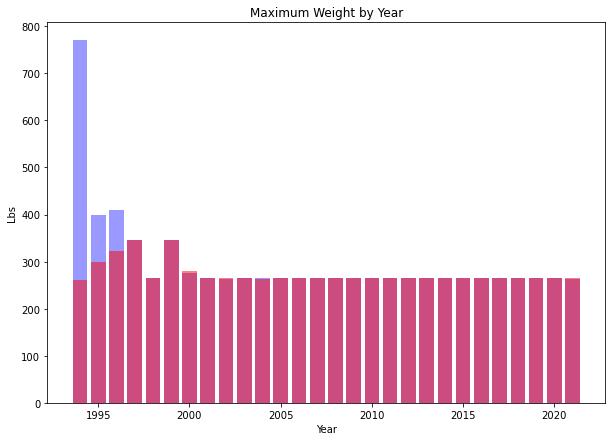

In [48]:

blue = df_data.groupby(df_data.Date_frmt.dt.year)['B_Weight_lbs'].max()
red = df_data.groupby(df_data.Date_frmt.dt.year)['R_Weight_lbs'].max()

plt.figure(figsize =(10, 7))
plt.title('Maximum Weight by Year')
plt.xlabel('Year')
plt.ylabel('Lbs')
plt.bar(blue.index,blue.values,alpha=0.4, color='b')
plt.bar(red.index,red.values, alpha=0.5, color='r')
plt.show()

In [49]:
# Check how many fighters have a reach but no height.

height_check = df_fighter[df_fighter['Height_cm'].isna()]['Reach_cm'].sort_values()
print('Reach with no height: ' + str(height_check[height_check.values > 0].count()) )

Reach with no height: 1


In [50]:
# Check how many fighters have a height but no height.

reach_check = df_fighter[df_fighter['Reach_cm'].isna()]['Height_cm'].sort_values()
print('Height with no reach: ' + str(reach_check[reach_check.values > 0].count()) )

Height with no reach: 1650


In [51]:
# Now we will use the radio of height to reach to full in nulls for both height and reach. 
# There's only one fighter with a reach but no height, so we could drop this. But for this project, I'll fill it in.

hgt_rch_ratio = df_fighter['Height_cm']/df_fighter['Reach_cm']
hgt_rch_ratio = hgt_rch_ratio.mean()
hgt_rch_ratio

0.9763573635628108

In [52]:
# function that populates reach based on height and average ratio between height and reach
def populate_height(reach):
    if reach is np.NaN:
        return reach
    else:
        return reach * hgt_rch_ratio

In [53]:
# function that populates reach based on height and average ratio between height and reach
def populate_reach(height):
    if height is np.NaN:
        return height
    else:
        return height / hgt_rch_ratio

In [54]:
# run function on all nulls in height
df_fighter.loc[df_fighter['Height_cm'].isna(), 'Height_cm'] = df_fighter.loc[df_fighter['Height_cm'].isna(), 'Reach_cm'].apply(populate_height)
df_fighter['Height_cm'] = df_fighter['Height_cm'].round(decimals=1)

In [55]:
# run function on all nulls reach
df_fighter.loc[df_fighter['Reach_cm'].isna(), 'Reach_cm'] = df_fighter.loc[df_fighter['Reach_cm'].isna(), 'Height_cm'].apply(populate_reach)
df_fighter['Reach_cm'] = df_fighter['Reach_cm'].round(decimals=1)

In [56]:
# check remaining height nulls

df_fighter[df_fighter['Height_cm'].isna()]
reach_nulls = str(df_fighter['Reach_cm'].isna().sum())
height_nulls = str(df_fighter['Reach_cm'].isna().sum())
print('There are ' + str(df_fighter.shape[0]) + ' rows. There are ' + reach_nulls + ' remaining nulls in reach and ' + height_nulls + ' remaining nulls in height.')

There are 3596 rows. There are 262 remaining nulls in reach and 262 remaining nulls in height.


In [57]:
# Go back to those

# Age

#df_fighter[df_fighter['DOB'].isna()]

pd.set_option('display.max_rows', None)
sort_na_v4 = df_fighter.isna().sum()
sort_na_v4 = sort_na_v4[sort_na_v4 != 0].sort_values(ascending=False)
sort_na_v4  


Reach         1912
Stance         804
DOB            739
Height         263
Height_cm      262
Reach_cm       262
Weight          74
Weight_lbs      74
dtype: int64

In [58]:
# left join on red fighter to make replacements.
df_data_merge = df_data.merge(df_fighter, left_on='R_fighter', right_on='fighter_name', how='left')

In [59]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
R_reach_nulls = df_data_merge[df_data_merge['R_Reach_cms'].isna()]
R_height_nulls = df_data_merge[df_data_merge['R_Height_cms'].isna()]

In [60]:
df_data_merge.R_Reach_cms.fillna(df_data_merge.Reach_cm, inplace=True)
df_data_merge.R_Height_cms.fillna(df_data_merge.Height_cm, inplace=True)

In [61]:
df_data_merge[df_data_merge['R_Reach_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
4479,Tom Blackledge,Anthony Perosh,John Sharp,2011-02-26,"Sydney, New South Wales, Australia",Blue,False,LightHeavyweight,0.25,0.5,0.4075,0.475,0.0675,0.25,0.0,0.5,0.0,0.5,43.5,18.5,89.5,34.25,52.0,26.5,121.5,63.25,8.25,0.75,0.75,0.25,36.5,11.75,84.0,29.0,1.0,0.75,3.5,3.25,6.0,6.0,2.0,2.0,32.75,11.25,61.25,18.0,8.5,5.5,11.75,7.75,2.25,1.75,16.5,8.5,85.75,166.25,565.5,6,0,0,3,0,0,3,0,0,0,0,0,0,0,Orthodox,190.5,190.5,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,205.0,38.0,NaN,2011-02-26,Tom Blackledge,NaN,205 lbs.,NaN,Orthodox,NaN,2.91,61%,2.55,46%,0.0,0%,75%,0.0,NaN,205.0,NaN
5859,Tulio Palhares,Adriano Santos,John McCarthy,1998-10-16,"Sao Paulo, Brazil",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [62]:
#pd.set_option('display.max_rows', 70)
#df_data_merge.sort_values(by='R_Reach_cms', ascending=True)

In [64]:
# Drop merged columns, unneeded now.
df_data_merge.drop(['fighter_name','Height','Weight','Reach','Stance','DOB','SLpM','Str_Acc','SApM','Str_Def','TD_Avg','TD_Acc','TD_Def','Sub_Avg','Height_cm','Weight_lbs','Reach_cm'],axis=1,inplace=True)

In [65]:
# left join on blue fighter to make replacements.
df_data_merge = df_data_merge.merge(df_fighter, left_on='B_fighter', right_on='fighter_name', how='left')

In [66]:
B_reach_nulls = df_data_merge[df_data_merge['B_Reach_cms'].isna()]
B_height_nulls = df_data_merge[df_data_merge['B_Height_cms'].isna()]


In [72]:
B_reach_nulls

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
92,Ricky Simon,Gaetano Pirrello,Keith Peterson,2021-01-20,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Red,False,Bantamweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,170.18,NaN,135.0,0.125,0.15625,0.436875,0.494688,0.477187,0.289687,0.03125,0.0,0.03125,0.5,124.9375,53.96875,119.0,53.53125,141.34375,69.9375,126.6875,60.40625,10.65625,5.53125,2.5625,0.5,103.1875,37.0,102.21875,41.09375,13.96875,10.0625,14.34375,10.90625,7.78125,6.90625,2.4375,1.53125,112.21875,42.8125,113.875,50.28125,6.71875,5.625,3.6875,2.15625,6.0,5.53125,1.4375,1.09375,241.09375,25.21875,793.25,16,0,3,0,3,4,2,0,0,1,2,1,0,0,Orthodox,167.64,175.26,135.0,28.0,28.0,2021-01-20,Gaetano Pirrello,"5' 7""",135 lbs.,NaN,Orthodox,"Apr 29, 1992",0.67,42%,1.89,46%,0.00,0%,30%,0.0,170.2,135.0,174.3
102,Mike Davis,Mason Jones,Keith Peterson,2021-01-20,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [73]:
 df_data_merge[df_data_merge['B_Reach_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
5847,Laverne Clark,Frank Caracci,Tony Mullinax,1999-01-08,"New Orleans, Louisiana, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,180.34,184.70,170.0,NaN,25.0,1999-01-08
5859,Tulio Palhares,Adriano Santos,John McCarthy,1998-10-16,"Sao Paulo, Brazil",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,1998-10-16
5867,Chuck Liddell,Noe Hernandez,Joe Hamilton,1998-05-15,"Mobile, Alabama, USA",Red,False,Middleweight,NaN,NaN,NaN,NaN,N

In [68]:
df_data_merge.B_Reach_cms.fillna(df_data_merge.Reach_cm, inplace=True)
df_data_merge.B_Height_cms.fillna(df_data_merge.Height_cm, inplace=True)

In [80]:
df_data_merge[df_data_merge['B_Reach_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
5847,Laverne Clark,Frank Caracci,Tony Mullinax,1999-01-08,"New Orleans, Louisiana, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,180.34,184.70,170.0,NaN,25.0,1999-01-08
5859,Tulio Palhares,Adriano Santos,John McCarthy,1998-10-16,"Sao Paulo, Brazil",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,1998-10-16
5867,Chuck Liddell,Noe Hernandez,Joe Hamilton,1998-05-15,"Mobile, Alabama, USA",Red,False,Middleweight,NaN,NaN,NaN,NaN,N

In [71]:
# Drop merged columns, unneeded now.
df_data_merge.drop(['fighter_name','Height','Weight','Reach','Stance','DOB','SLpM','Str_Acc','SApM','Str_Def','TD_Avg','TD_Acc','TD_Def','Sub_Avg','Height_cm','Weight_lbs','Reach_cm'],axis=1,inplace=True)

In [102]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_data_merge.isna().sum().sort_values(ascending=False)

B_avg_opp_CLINCH_landed         1302
B_avg_opp_TD_att                1302
B_avg_HEAD_att                  1302
B_avg_HEAD_landed               1302
B_avg_opp_HEAD_att              1302
B_avg_opp_HEAD_landed           1302
B_avg_BODY_att                  1302
B_avg_BODY_landed               1302
B_avg_opp_BODY_landed           1302
B_avg_LEG_att                   1302
B_avg_LEG_landed                1302
B_avg_opp_LEG_att               1302
B_avg_opp_LEG_landed            1302
B_avg_DISTANCE_att              1302
B_avg_DISTANCE_landed           1302
B_avg_opp_DISTANCE_att          1302
B_avg_opp_DISTANCE_landed       1302
B_avg_CLINCH_att                1302
B_avg_CLINCH_landed             1302
B_avg_opp_CLINCH_att            1302
B_avg_GROUND_att                1302
B_avg_GROUND_landed             1302
B_avg_opp_GROUND_att            1302
B_avg_opp_GROUND_landed         1302
B_avg_CTRL_time(seconds)        1302
B_avg_opp_CTRL_time(seconds)    1302
B_total_time_fought(seconds)    1302
B

In [103]:
# Check Age
age = df_data_merge[df_data_merge['B_age'].isna()]
age_count = df_fighter[(df_fighter['fighter_name'].isin(age['B_fighter']))]
age_count.groupby(['DOB']).size().sort_values(ascending=False)

Series([], dtype: int64)

In [101]:
# Nothing available in DOB. Drop these rows.
df_data_merge.dropna(subset = ['B_age', 'R_age'], inplace=True)

In [96]:
# The last clean up is the stats and referee. Referee won't be used for analysis, so I could drop that column. Leaving it for now.
# Stats

Series([], dtype: int64)